In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.', untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

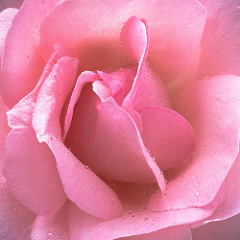

In [ ]:
PIL.Image.open(str(roses[2]))

In [ ]:
image = PIL.Image.open(str(roses[2]))
dir(image)

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'bits',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'entropy',
 'filename',
 'filter',
 'format',
 'format_description',
 'fp'

In [ ]:
image.mode

'RGB'

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][1]))
img.shape

(223, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X,y = [],[]

for flower_name, images in flowers_images_dict.items():
    for flower in images:
        img = cv2.imread(str(flower))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(3670, 180, 180, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
len(X_train)

2752

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
num_classes = 5
from tensorflow import keras

model_cnn = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_classes)
])

model_cnn.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model_cnn.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 16s 20ms/step - loss: 1.2495 - accuracy: 0.4782
Epoch 2/10
86/86 [==============================] - 2s 20ms/step - loss: 0.9460 - accuracy: 0.6315
Epoch 3/10
86/86 [==============================] - 2s 20ms/step - loss: 0.7648 - accuracy: 0.7082
Epoch 4/10
86/86 [==============================] - 2s 20ms/step - loss: 0.5548 - accuracy: 0.8045
Epoch 5/10
86/86 [==============================] - 2s 20ms/step - loss: 0.3913 - accuracy: 0.8557
Epoch 6/10
86/86 [==============================] - 2s 20ms/step - loss: 0.2160 - accuracy: 0.9295
Epoch 7/10
86/86 [==============================] - 2s 20ms/step - loss: 0.1162 - accuracy: 0.9615
Epoch 8/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0745 - accuracy: 0.9782
Epoch 9/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0546 - accuracy: 0.9851
Epoch 10/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0302 - accuracy: 0.9927


In [ ]:
model_cnn.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 1.9598 - accuracy: 0.6394


[1.9597630500793457, 0.6394335627555847]

In [ ]:
predictions = model_cnn.predict(X_test_scaled)

In [ ]:
np.argmax(tf.nn.softmax(predictions[0]))

1

In [ ]:
y_test[0]

1

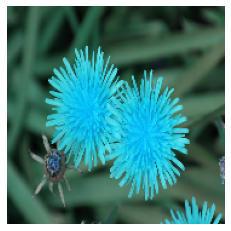

In [ ]:
plt.axis('off')
plt.imshow(X_train_scaled[0])

In [ ]:
from tensorflow import keras
num_classes = 5

In [ ]:
data_augmentation = keras.Sequential([
#     keras.layers.experimental.preprocessing.RandomContrast(0.3),
#     keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.RandomRotation(0.1)
])

In [ ]:
model_cnn = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_classes)
])

model_cnn.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model_cnn.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 3s 22ms/step - loss: 1.3178 - accuracy: 0.4386
Epoch 2/30
86/86 [==============================] - 2s 21ms/step - loss: 1.0722 - accuracy: 0.5749
Epoch 3/30
86/86 [==============================] - 2s 21ms/step - loss: 0.9569 - accuracy: 0.6377
Epoch 4/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8554 - accuracy: 0.6650
Epoch 5/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8056 - accuracy: 0.7006
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.7550 - accuracy: 0.7191
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.6945 - accuracy: 0.7376
Epoch 8/30
86/86 [==============================] - 2s 22ms/step - loss: 0.6474 - accuracy: 0.7551
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.6227 - accuracy: 0.7627
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.5841 - accuracy: 0.7762
Epoch 11/

In [ ]:
model_cnn.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 1.3346 - accuracy: 0.7255


[1.3345946073532104, 0.7254902124404907]